In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tiles3 as tc
import gymnasium as gym
from agents import SarsaLambdaAgent

import time
from tqdm import tqdm
from IPython.display import clear_output

In [2]:
class TileCoder:

    def __init__(self, iht_size, num_tiles, num_tilings):
        self.iht = tc.IHT(iht_size)
        self.num_tiles = num_tiles
        self.num_tilings = num_tilings

    def get_tiles(self, obs):
        hull_angle_speed, angular_velocity, horizontal_speed, vertical_speed, \
        leg1_joint1, leg1_joint1_angular, leg1_joint2, leg1_joint2_angular, leg1_contact, \
        leg2_joint1, leg2_joint1_angular, leg2_joint2, leg2_joint2_angular, leg2_contact, \
        lidar1, lidar2, lidar3, lidar4, lidar5, lidar6, lidar7, lidar8, lidar9, lidar10 = obs

        hull_angle_speed *= self.num_tiles / 6.2831854
        angular_velocity *= self.num_tiles / 10.0
        horizontal_speed *= self.num_tiles / 10.0
        vertical_speed *= self.num_tiles / 10.0

        leg1_joint1 *= self.num_tiles / 6.2831855
        leg1_joint1_angular *= self.num_tiles / 10.0
        leg1_joint2 *= self.num_tiles / 6.2831855
        leg1_joint2_angular *= self.num_tiles / 10.0
        leg1_contact *= self.num_tiles / 5.0

        leg2_joint1 *= self.num_tiles / 6.2831855
        leg2_joint1_angular *= self.num_tiles / 10.0
        leg2_joint2 *= self.num_tiles / 6.2831855
        leg2_joint2_angular *= self.num_tiles / 10.0
        leg2_contact *= self.num_tiles / 5.0

        lidar1 *= self.num_tiles / 2.0
        lidar2 *= self.num_tiles / 2.0
        lidar3 *= self.num_tiles / 2.0
        lidar4 *= self.num_tiles / 2.0
        lidar5 *= self.num_tiles / 2.0
        lidar6 *= self.num_tiles / 2.0
        lidar7 *= self.num_tiles / 2.0
        lidar8 *= self.num_tiles / 2.0
        lidar9 *= self.num_tiles / 2.0
        lidar10 *= self.num_tiles / 2.0

        tiles = tc.tiles(
            self.iht, self.num_tilings, [
                hull_angle_speed, angular_velocity, horizontal_speed, vertical_speed, \
                leg1_joint1, leg1_joint1_angular, leg1_joint2, leg1_joint2_angular, leg1_contact, \
                leg2_joint1, leg2_joint1_angular, leg2_joint2, leg2_joint2_angular, leg2_contact
            ]
        )
        return tiles

In [3]:
def plot(rewards_list):
    plt.figure(figsize=(4, 3))
    plt.plot(rewards_list, color='mediumseagreen', linewidth=1)
    plt.plot([0, len(rewards_list)-1], [300, 300], linestyle='dashed', color='grey', alpha=0.5)
    plt.grid(alpha=0.2)
    plt.title('SARSA(λ) for BipedalWalker-v3')
    plt.xlabel('Episode')
    plt.ylabel('Total reward per episode')
    plt.show()
    print('iht:', tilecoder.iht.count())
    clear_output(wait=True)

def render(env, episode, step, action, reward):
    img = env.render()
    plt.imshow(img)
    plt.text(15, 30, 'Episode: ' + str(episode))
    plt.text(15, 50, 'Step: ' + str(step))
    plt.text(15, 70, 'Action: ' + str(action))
    plt.text(15, 90, 'Reward: ' + str(round(reward, 4)))
    plt.show()
    clear_output(wait=True)

In [4]:
actions = [
    [-1.0, 0.5, 1.0, -0.5],
    [1.0, -0.5, -1.0, 0.5]
]

def get_action(action_idx):
    action = np.array(actions[action_idx])
    return action

In [5]:
tilecoder = TileCoder(iht_size=131072, num_tiles=8, num_tilings=8)
agent = SarsaLambdaAgent(num_actions=len(actions), tilecoder=tilecoder)
tiles = tilecoder.get_tiles(np.zeros(24))
agent.alpha = 0.5 / len(tiles)
agent.gamma = 1.0
agent.epsilon = 0.0
agent.lambd = 0.9
episode = 0
rewards_list = []

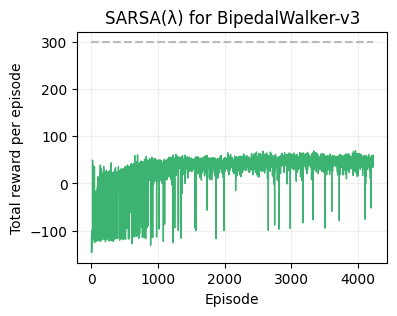

iht: 36085


In [13]:
num_episodes = 5000
plot_episode = 10
agent.alpha = 0.005 / len(tiles)
agent.epsilon = 0.1

env = gym.make('BipedalWalker-v3')
for i in range(num_episodes):
    obs, _ = env.reset()
    action = get_action(agent.start(obs))
    rewards = 0
    while True:
        obs, reward, done, over, _ = env.step(action)
        action = get_action(agent.step(obs, reward))
        rewards += reward
        if done or over:
            agent.end(reward)
            break
    rewards_list.append(rewards)
    episode += 1
    if i % plot_episode == 0:
        plot(rewards_list)

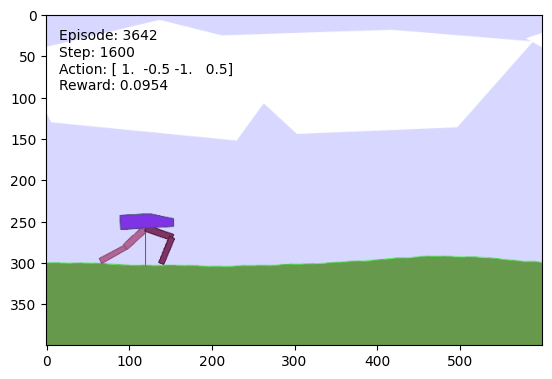

In [11]:
env = gym.make('BipedalWalker-v3', render_mode='rgb_array')
obs, _ = env.reset()
action = get_action(agent.start(obs))
step = 0
while True:
    obs, reward, done, over, _ = env.step(action)
    action = get_action(agent.step(obs, reward))
    step += 1
    render(env, episode, step, action, reward)
    if done or over:
        agent.end(reward)
        break